# Определение выгодного тарифа для телеком компании

**Цель исследования** - анализ поведения клиентов, определение наиболее экономически привлекательного для компании тарифа.

В рамках исследования мы проанализируем поведение клиентов двух тарифов - "Смарт" и "Ультра" и определим какой из тарифов приносит наибольшую экономичекую выгоду.

**Ход исследования:**

Проведем исследование в соответствии со следующим порядком:
1. Проведем анализ количества минут разговора, количества отправленных SMS и количества потраченного интернет-трафика в рамках тарифа.
2. Проведем анализ среднего кличества, дисперсии и стандартного отклонения по выборке, опишем распределения.
3. Проверим несколько гипотез:
 * средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
 * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
 
**Исследование проведем в 4 этапа:**
1. Изучим датасет.
2. Подготовим данные для анализа.
3. Проведем исследовательский анализ.
4. Проверим гипотезы.

**Исследуемые тарифы:**

*Тариф «Смарт»:*
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
 * минута разговора: 3 рубля
 * сообщение: 3 рубля
 * 1 Гб интернет-трафика: 200 рублей
 
 
 *Тариф «Ультра»:*
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
 * минута разговора: 1 рубль
 * сообщение: 1 рубль
 * 1 Гб интернет-трафика: 150 рублей

## Обзор данных

Импортируем необходимые для работы библиотеки.

In [1]:
# Импорт стандартных библиотек
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

Импортируем исследуемые датасеты.

In [2]:
# Проверка на исключение при локальном доступе и доступе на сервере к датасетам
try:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')
except:
    calls = pd.read_csv('D:\\Users\\BlackEdition\\Desktop\\'
                        'Data Science\\Обучение в Яндекс\\'
                        '5. Статистический анализ данных\\Проект\\calls.csv')
    internet = pd.read_csv('D:\\Users\\BlackEdition\\Desktop\\'
                           'Data Science\\Обучение в Яндекс\\'
                           '5. Статистический анализ данных\\Проект\\internet.csv')
    messages = pd.read_csv('D:\\Users\\BlackEdition\\Desktop\\'
                           'Data Science\\Обучение в Яндекс\\'
                           '5. Статистический анализ данных\\Проект\\messages.csv')
    tariffs = pd.read_csv('D:\\Users\\BlackEdition\\Desktop\\'
                          'Data Science\\Обучение в Яндекс\\'
                          '5. Статистический анализ данных\\Проект\\tariffs.csv')
    users = pd.read_csv('D:\\Users\\BlackEdition\\Desktop\\'
                        'Data Science\\Обучение в Яндекс\\'
                        '5. Статистический анализ данных\\Проект\\users.csv')

Выведем информацию по датасетам на экран.

In [3]:
datasets = [calls, internet, messages, tariffs, users]

for dataset in datasets:
    display(dataset)
    display(dataset.info())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

### Вывод

Из проведенного обзора данных можно сделать следующие выводы:
 * Столбцы по всем выборкам соответствуют snake_case.
 * В данных нет пропущенных значений, за иключением колонки *`churn_date`* в датасете *`Users`*.
 * Типы данные соответствуют ожиданиям, за исключением колонок в различных датасетах с датами. Их необходимо будет привести к формату *`datetime`*.

Описание данных:
1. Таблица `users` (информация о пользователях):
   * `user_id` — уникальный идентификатор пользователя
   * `first_name` — имя пользователя
   * `last_name` — фамилия пользователя
   * `age` — возраст пользователя (годы)
   * `reg_date` — дата подключения тарифа (день, месяц, год)
   * `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
   * `city` — город проживания пользователя
   * `tariff` — название тарифного плана
2. Таблица `calls` (информация о звонках):
   * `id` — уникальный номер звонка
   * `call_date` — дата звонка
   * `duration` — длительность звонка в минутах
   * `user_id` — идентификатор пользователя, сделавшего звонок
3. Таблица `messages` (информация о сообщениях):
   * `id` — уникальный номер сообщения
   * `message_date` — дата сообщения
   * `user_id` — идентификатор пользователя, отправившего сообщение
4. Таблица `internet` (информация об интернет-сессиях):
   * `id` — уникальный номер сессии
   * `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
   * `session_date` — дата интернет-сессии
   * `user_id` — идентификатор пользователя
5. Таблица `tariffs` (информация о тарифах):
   * `tariff_name` — название тарифа
   * `rub_monthly_fee` — ежемесячная абонентская плата в рублях
   * `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
   * `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
   * `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
   * `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 м`нуты будет взиматься плата)
   * `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
   * `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Предобработка данных

### Изменение типов данных

Изменим тип данных столбцов *`churn_date`, `reg_date`, `message_date`, `session_date`, `call_date`* с *`object`* на *`datetime`*.

In [4]:
# Датасеты и их столбцы для приведения к формату datetime
reduction_to_datetime = {'churn_date': users,
                         'reg_date': users,
                         'message_date': messages,
                         'session_date': internet,
                         'call_date': calls}

# Цикл для перебора столбцов и замены object на datetime
for column, df in reduction_to_datetime.items():
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')

Проверим внесенные изменения.

In [5]:
datasets = [users, messages, internet, calls]

for dataset in datasets:
    display(dataset.dtypes)
    display()

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

Unnamed: 0               int64
id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

Форматы колонок изменены корректно.

### Проверка на пропуски

Проверим данные на NAN значения по столбцам датасета *users*.

In [6]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Из проведенной проверки видно, что `NAN` значения имеются только в колонке *`churn_dat`e*. *`Churn_date`* означает дату окончания пользования тарифом. Т.к. для дальшейнего исследовательского анализа и проверки гипотез нам данная информация не нужна, поэтому принято решение не прозводить заполнение данных по данному столбцу.

### Подготовка данных

Подготовим данные к анализу - добавим в датасеты *`calls`, `messages`, `internet`* стобцы с месяцами.

In [7]:
# Выедление месяца из датасетов в отдельную колонку
calls['month'] = calls["call_date"].dt.month
messages['month'] = messages["message_date"].dt.month
internet['month'] = internet['session_date'].dt.month

In [8]:
datasets = [calls, messages, internet]

for dataset in datasets:
    display(dataset.head(12))
    display()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
5,1000_5,2018-11-02,0.00,1000,11
6,1000_6,2018-10-18,0.00,1000,10
7,1000_7,2018-08-22,18.31,1000,8
8,1000_8,2018-09-15,18.44,1000,9
9,1000_9,2018-08-15,0.00,1000,8


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9
5,5,1000_5,399.97,2018-10-02,1000,10
6,6,1000_6,540.08,2018-09-07,1000,9
7,7,1000_7,415.70,2018-07-11,1000,7
8,8,1000_8,505.40,2018-10-08,1000,10
9,9,1000_9,345.54,2018-09-03,1000,9


Столбцы с месяцами дабавлены.

Подсчитаем следующие показатели:
 * количество сделанных звонков и израсходованных минут разговора по месяцам;
 * количество отправленных сообщений по месяцам;
 * объем израсходованного интернет-трафика по месяцам.

In [9]:
calls['duration'] = calls['duration'].apply(math.ceil)
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [10]:
# Подсчет количество сделанных звонков и израсходованных минут по месяцам
calls_df = (calls.pivot_table(index=['user_id', 'month'],
                             values='duration',
                             aggfunc=[len, np.sum])
                .reset_index())
calls_df.columns = calls_df.columns.droplevel(1)
calls_df

,user_id,month,len,sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


In [11]:
# Подсчет количества отправленных смс по месяцам
message_df = (messages.pivot_table(index=['user_id', 'month'],
                                  values='message_date',
                                  aggfunc=len)
                     .reset_index())
message_df

,user_id,month,message_date
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [12]:
# Подсчет количества потраченных мегабайт интернета
internet_df = (internet.pivot_table(index=['user_id', 'month'],
                                   values='mb_used',
                                   aggfunc=np.sum)
                      .reset_index())

# Функция округления мегабайтов по месяцам до целочисленных гигобайтов
def rounding_up_traffic(row):
    rounded_value = math.ceil(row['mb_used'] / 1024) * 1024
    return rounded_value

internet_df['mb_used'] = internet_df.apply(rounding_up_traffic, axis=1)
internet_df

,user_id,month,mb_used
0,1000,5,3072
1,1000,6,23552
2,1000,7,14336
3,1000,8,14336
4,1000,9,15360
...,...,...,...
3198,1498,10,21504
3199,1499,9,2048
3200,1499,10,18432
3201,1499,11,18432


In [13]:
# Вспомогательная таблица по тарифам и местонахождению абонента для анализа данных и проверки гипотез
users_df = users[['user_id', 'tariff', 'city']]
users_df

,user_id,tariff,city
0,1000,ultra,Краснодар
1,1001,smart,Москва
2,1002,smart,Стерлитамак
3,1003,ultra,Москва
4,1004,ultra,Новокузнецк
...,...,...,...
495,1495,ultra,Иркутск
496,1496,smart,Вологда
497,1497,smart,Челябинск
498,1498,smart,Владикавказ


Сведем все данные в одну таблицу для проведения дальшейнего анализа.

In [14]:
# Сводная "смёрженная" таблица по предыдущим таблицам для дальнейшего анализа
result_df = (calls_df.merge(message_df,
                            how='outer',
                            on=['user_id', 'month'])
                     .merge(internet_df,
                            how='outer',
                            on=['user_id', 'month'])
                     .merge(users_df[['user_id', 'tariff', 'city']],
                            how='outer',
                            on='user_id'))

result_df

,user_id,month,len,sum,message_date,mb_used,tariff,city
0,1000,5.00,22.00,159.00,22.00,3072.00,ultra,Краснодар
1,1000,6.00,43.00,172.00,60.00,23552.00,ultra,Краснодар
2,1000,7.00,47.00,340.00,75.00,14336.00,ultra,Краснодар
3,1000,8.00,52.00,408.00,81.00,14336.00,ultra,Краснодар
4,1000,9.00,58.00,466.00,57.00,15360.00,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3211,1489,10.00,NaN,NaN,21.00,20480.00,smart,Санкт-Петербург
3212,1489,11.00,NaN,NaN,20.00,18432.00,smart,Санкт-Петербург
3213,1489,12.00,NaN,NaN,35.00,17408.00,smart,Санкт-Петербург
3214,1128,NaN,NaN,NaN,NaN,NaN,ultra,Волжский


Переименуем столцы в сводной таблице для упрощения чтения информации.

In [15]:
# Переимнование столбцов сводного датасета
rename_columns = {'user_id_calls': 'user_id',
                  'month_calls': 'month',
                  'len': 'number_of_calls',
                  'sum': 'minutes_spent',
                  'message_date': 'sms_sent'}
result_df = result_df.rename(columns=rename_columns)

result_df

,user_id,month,number_of_calls,minutes_spent,sms_sent,mb_used,tariff,city
0,1000,5.00,22.00,159.00,22.00,3072.00,ultra,Краснодар
1,1000,6.00,43.00,172.00,60.00,23552.00,ultra,Краснодар
2,1000,7.00,47.00,340.00,75.00,14336.00,ultra,Краснодар
3,1000,8.00,52.00,408.00,81.00,14336.00,ultra,Краснодар
4,1000,9.00,58.00,466.00,57.00,15360.00,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3211,1489,10.00,NaN,NaN,21.00,20480.00,smart,Санкт-Петербург
3212,1489,11.00,NaN,NaN,20.00,18432.00,smart,Санкт-Петербург
3213,1489,12.00,NaN,NaN,35.00,17408.00,smart,Санкт-Петербург
3214,1128,NaN,NaN,NaN,NaN,NaN,ultra,Волжский


Подсчитаем количество пропущнных значений после объединения таблиц.

In [16]:
result_df.isna().sum()

user_id              0
month                2
number_of_calls     42
minutes_spent       42
sms_sent           499
mb_used             13
tariff               0
city                 0
dtype: int64

В данных появились пропущенные значения. Заменим их на нули, т.к. `NAN` в этих столбцах означает отсутствие звонков, смс или потраченных мегабайт интернета.

In [17]:
# Заполнение NAN значений нулями через цикл
columns = ['number_of_calls', 'minutes_spent', 'sms_sent', 'mb_used']

for column in columns:
    result_df[column] = result_df[column].fillna(0)

result_df.isna().sum()

user_id            0
month              2
number_of_calls    0
minutes_spent      0
sms_sent           0
mb_used            0
tariff             0
city               0
dtype: int64

Пропущенных значения успешно заменены.

Создадим функцию для расчета помесячной выручки, полученной с каждого пользователя.

In [18]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [19]:
# Функция по расчету доходов по месяцам по абоненту каждого тарифа
def income(row):  # Фукнция принимает на вход строку датасета
    def over_the_package(parametres):  # Функция принимает параметры тарифа
        minutes_over = 0
        sms_over = 0
        mb_over = 0
        # Обработка через логику параметров.
        # Если использованных минут больше, чем тарифных, то вернем их разницу.
        if row['minutes_spent'] > parametres['munutes_available']: 
            minutes_over = row['minutes_spent'] - parametres['munutes_available']
        if row['sms_sent'] > parametres['sms_available']:
            sms_over = row['sms_sent'] - parametres['sms_available']
        if row['mb_used'] > parametres['mb_available']:
            mb_over = (row['mb_used'] - parametres['mb_available']) / 1024
        return minutes_over, sms_over, mb_over

    smart = {
        'munutes_available': tariffs['minutes_included'][0],
        'sms_available': tariffs['messages_included'][0],
        'mb_available': tariffs['mb_per_month_included'][0]
    }

    ultra = {
        'munutes_available': tariffs['minutes_included'][1],
        'sms_available': tariffs['messages_included'][1],
        'mb_available': tariffs['mb_per_month_included'][1]
    }
        
    # Расчет суммы затрат сверх оплаченных в рамках тарифа лимитов
    if row['tariff'] == 'smart':
        income = tariffs['rub_monthly_fee'][0]
        minutes_over, sms_over, mb_over = over_the_package(smart)
        income += (minutes_over * tariffs['rub_per_minute'][0]
                   + sms_over * tariffs['rub_per_message'][0]
                   + mb_over * tariffs['rub_per_gb'][0])    
    elif row['tariff'] == 'ultra':
        income = tariffs['rub_monthly_fee'][1]
        minutes_over, sms_over, mb_over = over_the_package(ultra)
        income += (minutes_over * tariffs['rub_per_minute'][1]
                   + sms_over * tariffs['rub_per_message'][1]
                   + mb_over * tariffs['rub_per_gb'][1])

    return income

# Применение функции income к каждой колоке датасета result_df
result_df['income'] = result_df.apply(income, axis=1)

Функция рассчитала прибыль по каждому пользователю тарифа по месяцам.

Теперь все `float` значения приведем к формату `int` для удобства.

In [20]:
# Приведение float значений к integer
columns = ['number_of_calls', 'minutes_spent', 'sms_sent', 'mb_used']

for column in columns:
    result_df[column] = result_df[column].astype('int64')

result_df

,user_id,month,number_of_calls,minutes_spent,sms_sent,mb_used,tariff,city,income
0,1000,5.00,22,159,22,3072,ultra,Краснодар,1950.00
1,1000,6.00,43,172,60,23552,ultra,Краснодар,1950.00
2,1000,7.00,47,340,75,14336,ultra,Краснодар,1950.00
3,1000,8.00,52,408,81,14336,ultra,Краснодар,1950.00
4,1000,9.00,58,466,57,15360,ultra,Краснодар,1950.00
...,...,...,...,...,...,...,...,...,...
3211,1489,10.00,0,0,21,20480,smart,Санкт-Петербург,1550.00
3212,1489,11.00,0,0,20,18432,smart,Санкт-Петербург,1150.00
3213,1489,12.00,0,0,35,17408,smart,Санкт-Петербург,950.00
3214,1128,NaN,0,0,0,0,ultra,Волжский,1950.00


*Float* значения заменены.

In [21]:
result_df['income'].sum()

4916951.0

In [22]:
result_df[result_df['minutes_spent'] > 500].tail()

,user_id,month,number_of_calls,minutes_spent,sms_sent,mb_used,tariff,city,income
3160,1496,8.00,88,527,41,23552,smart,Вологда,2231.00
3163,1496,11.00,80,662,46,25600,smart,Вологда,3036.00
3164,1496,12.00,80,518,51,21504,smart,Вологда,1807.00
3167,1497,12.00,71,545,17,20480,smart,Челябинск,1685.00
3174,1499,11.00,74,612,59,18432,smart,Пермь,1513.00


### Вывод

Нами были произведены следующие дейтсвия:
 * даты приведены к типу *`datetime`*;
 * проведена проверка на пропуски исходных датасетов;
 * проведена подготовка данных:
   * добавлены дополнительные столбцы с месяцами;
   * посчитаны показатели количества сделанных звонков, количества потраченных минут, количества потраченных смс и количество затраченного интернет-трафика, рассчитана ежемесячная выручка по абонентам каждого из тарифов;
   * переименованы стобцы для лучшего восприятия инфорации;
   * заменены `NAN` значения;
   * float значения, так где это необходимо, заменены на формат integer;
   * информация сведена в единую таблицу для дальшейшего анализа и проверки гипотез.

## Исследовательский анализ данных

Исследуем поведение клиентов оператора, исходя из выборки.

Определим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

Посчитаем среднее количество, дисперсию и стандартное отклонение.

In [23]:
# Рассчет среднего, дисперсии, стандартного отклонения
result_df.pivot_table(index=['tariff'],
                      values=['minutes_spent', 'sms_sent', 'mb_used'],
                      aggfunc=[np.median, np.mean, np.var, np.std])

median                            mean                         \
       mb_used minutes_spent sms_sent  mb_used minutes_spent sms_sent   
tariff                                                                  
smart    17408        421.50       28 16713.24        417.75    33.37   
ultra    19456        518.00       38 19942.04        526.09    49.31   

                var                             std                         
            mb_used minutes_spent sms_sent  mb_used minutes_spent sms_sent  
tariff                                                                      
smart   34742943.65      36281.39   796.96  5894.31        190.48    28.23  
ultra  102108804.46     101052.49  2285.42 10104.89        317.89    47.81

Из проведенного анализа видно, что в среднем по тарифы *smart* пользователи тратят меньшее количество интернета, минут и смс, чем по тарифу *ultra*. При этом дисперсия и стандартное отклоение по тарифу *smart* по всем показателям тоже меньше - это говорит о том, что умный тариф используют люди одного класса и у них примерно одинаковое потребление. А вот тариф ультра используют люди с большими запросами, поэтому разброс значений в этом тарифе выше.

Построим гистограммы для сравнения показателей по разным тарифам:

Text(0, 0.5, 'Количество абонентов')

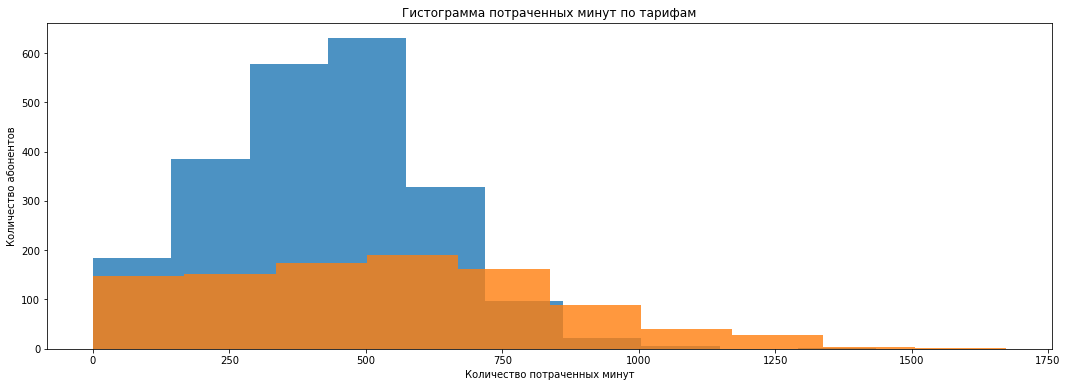

In [24]:
# Построение гистограммы по потраченным минутам по тарифам
plt.figure(figsize=(18, 6))
(result_df.loc[result_df['tariff'] == 'smart']['minutes_spent']
         .plot(kind='hist', alpha=0.8))
(result_df.loc[result_df['tariff'] == 'ultra']['minutes_spent']
         .plot(kind='hist', alpha=0.8))
plt.title('Гистограмма потраченных минут по тарифам')
plt.xlabel('Количество потраченных минут')
plt.ylabel('Количество абонентов')

Из гистограммы видно, что количества пользователей, которые тратят от 700 и более минут в месяц на звонки больше по тарифу *ultra*, но пользователей тарифы *smart* в целом больше. Данные по количеству потраченных минут по тарифам *smart и ultra* немного скошены влево (отрицательно скошеные), соответственно медиана должна быть меньше среднего.

Text(0, 0.5, 'Количество абонентов')

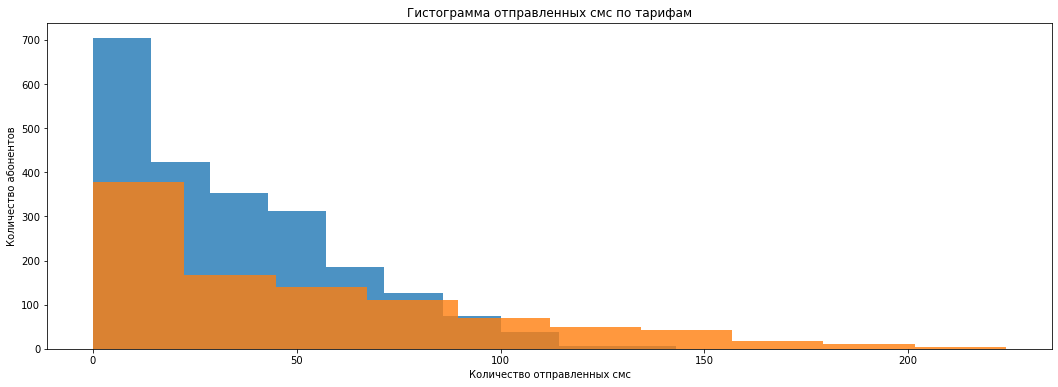

In [25]:
# Построение гистограммы по отправленным смс по тарифам
plt.figure(figsize=(18, 6))
(result_df.loc[result_df['tariff'] == 'smart']['sms_sent']
         .plot(kind='hist', alpha=0.8))
(result_df.loc[result_df['tariff'] == 'ultra']['sms_sent']
         .plot(kind='hist', alpha=0.8))
plt.title('Гистограмма отправленных смс по тарифам')
plt.xlabel('Количество отправленных смс')
plt.ylabel('Количество абонентов')

Из гистограммы видно, что в тарифе *ultra* имеются пользователи, которые тратят на смс от 100 и более смс. А пользователи тарифы *smart*, как правило, не превышают заложенного лимита в 50 смс. Данные по отправленным смс сообщениям сильно скошены влево. Медиана должна быть меньше среднего значения, что подтверждается если посмотреть на сводную таблицу.

Text(0, 0.5, 'Количество абонентов')

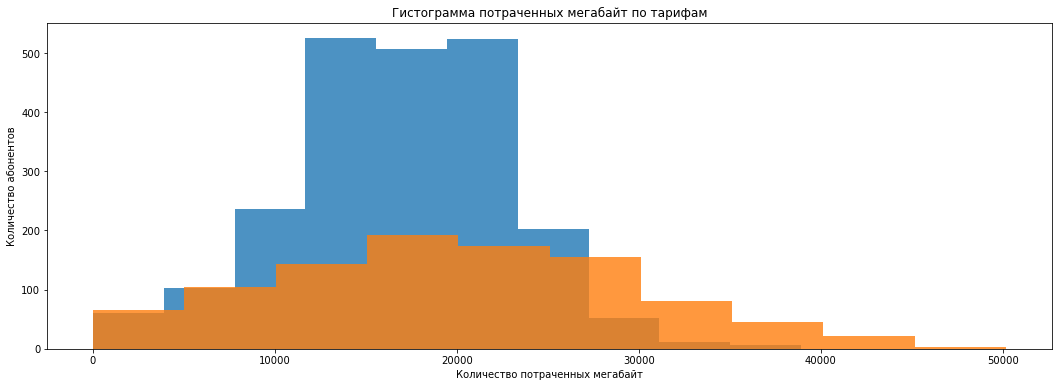

In [26]:
# Построение гистограммы по потраченным мегабайтам по тарифам
plt.figure(figsize=(18, 6))
(result_df.loc[result_df['tariff'] == 'smart']['mb_used']
         .plot(kind='hist', alpha=0.8))
(result_df.loc[result_df['tariff'] == 'ultra']['mb_used']
         .plot(kind='hist', alpha=0.8))
plt.title('Гистограмма потраченных мегабайт по тарифам')
plt.xlabel('Количество потраченных мегабайт')
plt.ylabel('Количество абонентов')

Из гистограммы видно, что пользователи тарифа *smart* как правило не используют больше 23 гб в месяц, а пользователи тарифа *ultra* распределены в виде колокола нормального распределения до 50 гб в месяц. Данные по потраченным мегабайтам имеют нормальное распределение.

Text(0, 0.5, 'Количество абонентов')

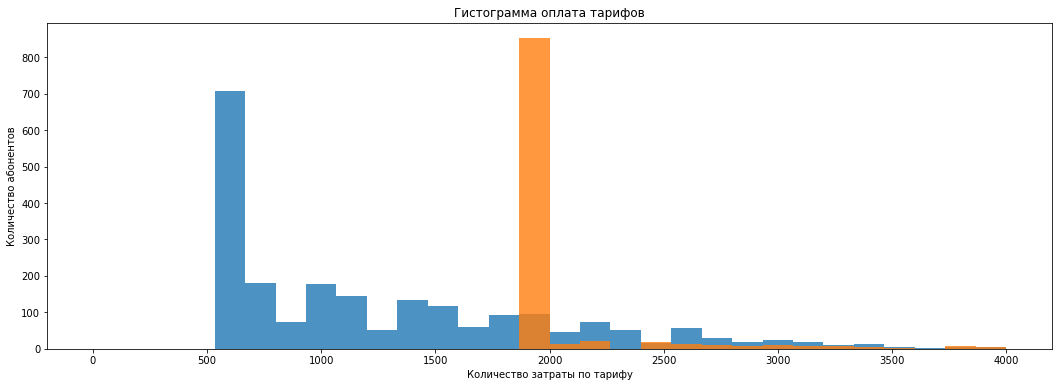

In [27]:
# Построение гистограммы по доходам по тарифам
plt.figure(figsize=(18, 6))
(result_df.loc[result_df['tariff'] == 'smart']['income']
         .plot(kind='hist', alpha=0.8, bins=30, range=(0, 4000)))
(result_df.loc[result_df['tariff'] == 'ultra']['income']
         .plot(kind='hist', alpha=0.8, bins=30, range=(0, 4000)))
plt.title('Гистограмма оплата тарифов')
plt.xlabel('Количество затраты по тарифу')
plt.ylabel('Количество абонентов')

Из гистограммы видно, что большинство пользователей тарифа *ultra* платят исключительно ежемесяный платеж, редко выходя за рамки лимита данного тарифа. Множество пользователетей тарифа *smart* платя ежемесячный платеж 500 рублей, но часто "вылазят" за рамки тарифа и платят больше. Данные скошены влево.

Рассчитаем суммарную выручку за 2018 год по двум рассматриваемым тарифам.

Тариф smart доходнее тарифа ультра на 834851.0 руб.


Text(0, 0.5, 'Доходность, млн. руб.')

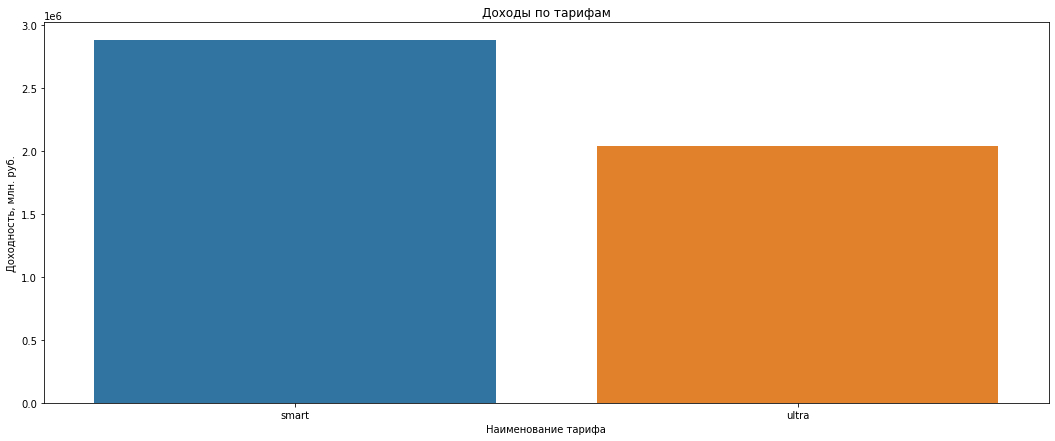

In [28]:
total_sales = result_df.pivot_table(index='tariff',
                                    values='income',
                                    aggfunc=np.sum)
difference = total_sales['income'][0] - total_sales['income'][1]

print(f'Тариф smart доходнее тарифа ультра на {difference} руб.')

plt.figure(figsize=(18, 7))
sns.barplot(x=total_sales.index,
            y=total_sales['income'])
plt.title('Доходы по тарифам')
plt.xlabel('Наименование тарифа')
plt.ylabel('Доходность, млн. руб.')

Из расчетов и гистограммы видно, что суммарная выручка по тарифу smart выше выручки по тарифу ultra на 834851 руб.

Посмотрим какой средний возраст пользователей в выборке и у каждого из тарифов

In [29]:
print('Средний возраст пользователей:', users['age'].mean())
print('Медианный возраст пользователей:', users['age'].median())

Средний возраст пользователей: 46.588
Медианный возраст пользователей: 46.0


Text(0, 0.5, 'Возраст, лет')

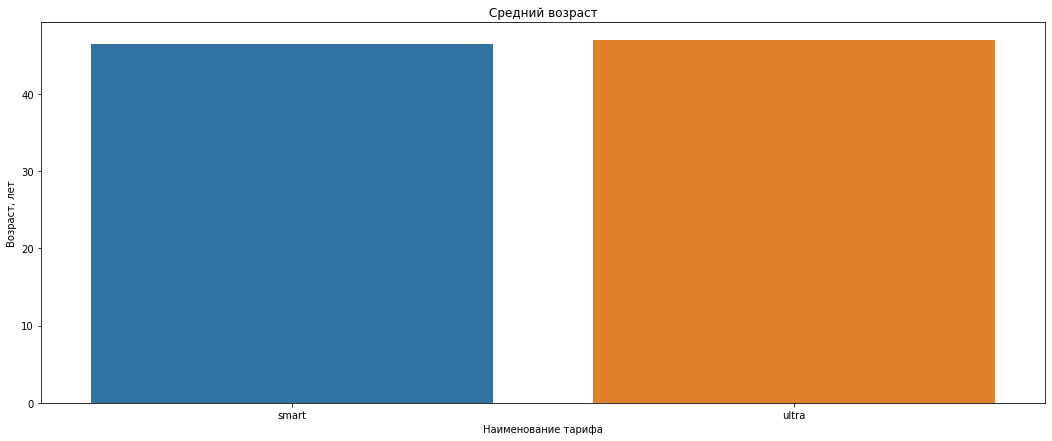

In [30]:
mean_age = users.pivot_table(index='tariff',
                             values='age')
plt.figure(figsize=(18, 7))
sns.barplot(x=mean_age.index,
            y=mean_age['age'])
plt.title('Средний возраст')
plt.xlabel('Наименование тарифа')
plt.ylabel('Возраст, лет')

Посчитаем сколько звонков сделали, минут, смс и мегабайт потратили абоненты по тарифам.

Text(0, 0.5, 'Количество минут')

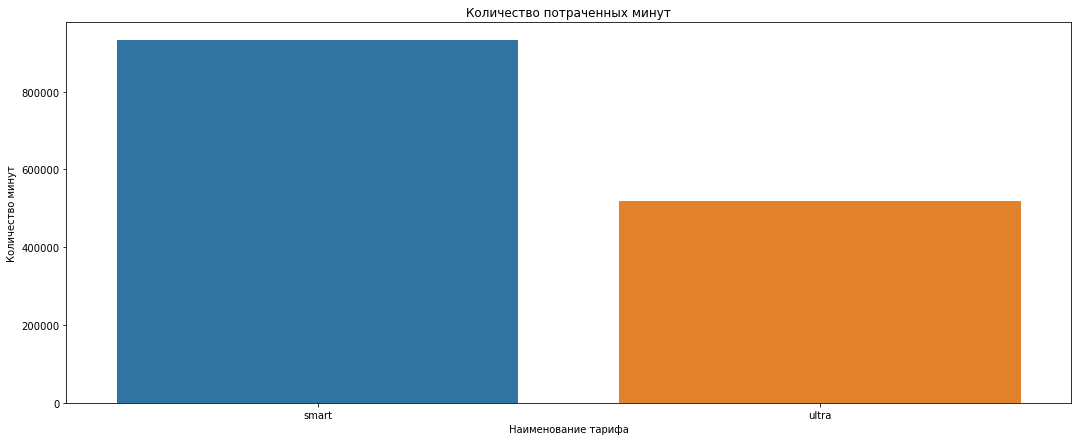

In [31]:
minutes_spent = result_df.pivot_table(index='tariff',
                                      values='minutes_spent',
                                      aggfunc=np.sum)
plt.figure(figsize=(18, 7))
sns.barplot(x=minutes_spent.index,
            y=minutes_spent['minutes_spent'])
plt.title('Количество потраченных минут')
plt.xlabel('Наименование тарифа')
plt.ylabel('Количество минут')

Text(0, 0.5, 'Количество смс')

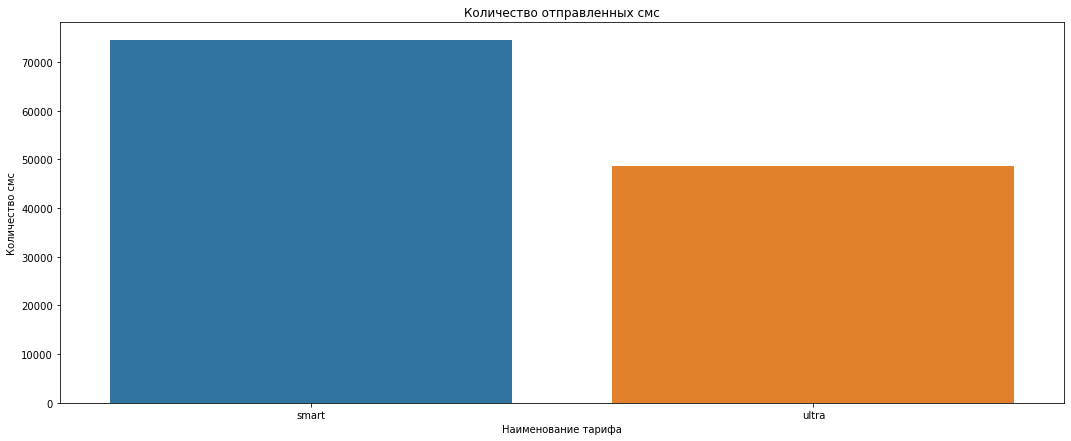

In [32]:
sms_sent = result_df.pivot_table(index='tariff',
                                 values='sms_sent',
                                 aggfunc=np.sum)
plt.figure(figsize=(18, 7))
sns.barplot(x=sms_sent.index,
            y=sms_sent['sms_sent'])
plt.title('Количество отправленных смс')
plt.xlabel('Наименование тарифа')
plt.ylabel('Количество смс')

Text(0, 0.5, 'Количество мегабайт')

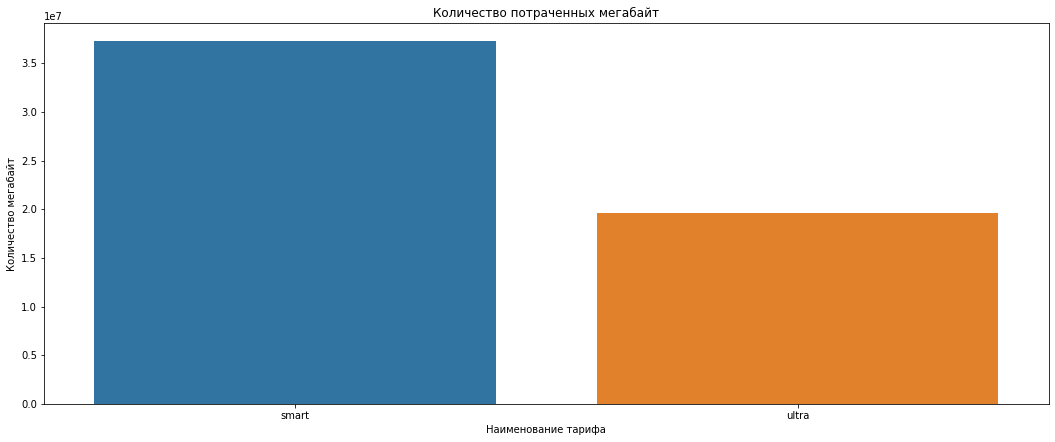

In [33]:
mb_used = result_df.pivot_table(index='tariff',
                                values='mb_used',
                                aggfunc=np.sum)
plt.figure(figsize=(18, 7))
sns.barplot(x=mb_used.index,
            y=mb_used['mb_used'])
plt.title('Количество потраченных мегабайт')
plt.xlabel('Наименование тарифа')
plt.ylabel('Количество мегабайт')

Text(0, 0.5, 'Количество звонков')

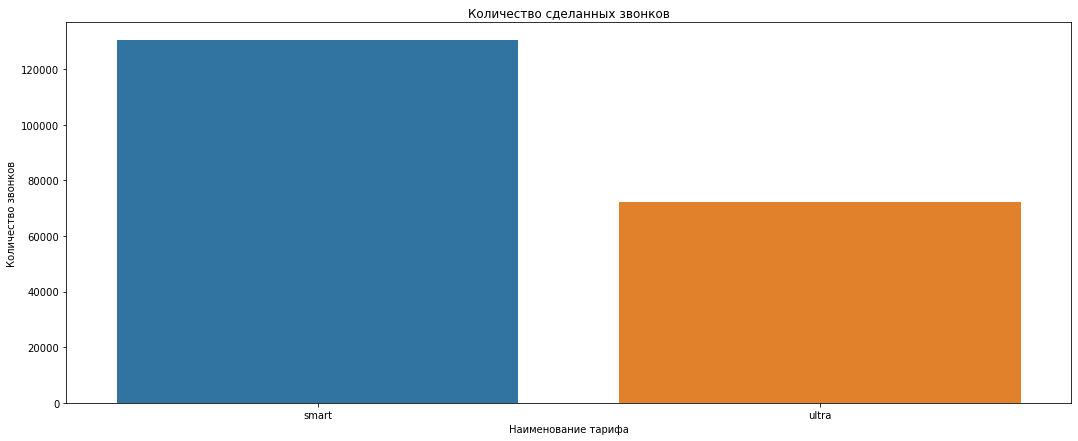

In [34]:
numbers_of_calls = result_df.pivot_table(index='tariff',
                                         values='number_of_calls',
                                         aggfunc=np.sum)
plt.figure(figsize=(18, 7))
sns.barplot(x=numbers_of_calls.index,
            y=numbers_of_calls['number_of_calls'])
plt.title('Количество сделанных звонков')
plt.xlabel('Наименование тарифа')
plt.ylabel('Количество звонков')

### Вывод

Из проведенного исследовательского анализа можно сделать вывод, что данные пользователи приведенных двух тарифов очень разные, тратят разное количество минут звонков, посылают разное количество смс сообщений, по разному пользуются интернетом. Пользователи тарифа *ultra* тратят большее число услуг, но в рамках оплаченного пакета, тогда как пользователи тарифа *smart* чаще всего выходят за рамки предоплаченного пакета услуг. Видимо потому что не хотят платить за дорогой пакет, но не рассчитывают свои потребности в звонках, смс и интернете.

## Проверка гипотез

### Гипотеза № 1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Проверим первую гепотезу о том, что выручка пользователей тарифов "ультра" и "смарт" различаются.

H0: нулевая гипотеза для нас заключается в том, что данные тарифы равны по объему выручки.

H1: альтарнативной теорией мы хотим доказать, что выручка по данным тарифам различна.

In [35]:
smart_tariff = result_df.loc[result_df['tariff'] == 'smart']['income']  # Выборка по тарифу smart
ultra_tariff = result_df.loc[result_df['tariff'] == 'ultra']['income']  # Выборка по тарифу ultra

alpha = .05  # Пороговое значение проверки гипотезы

# Проверка гипотезы
result = st.ttest_ind(smart_tariff,
                      ultra_tariff)

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 8.081909555489933e-161
Отвергаем нулевую гипотезу


Из проверки нулевой гипотезы видно, что шанс получить схожие данные при условии, что нулевая гипотеза верна, крайне мал, поэтому мы отвергаем нулевую гипотезу.

### Гипотеза № 2: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Проверим первую гепотезу о том, что выручка пользователей тарифов "ультра" и "смарт" различается в зависимости от региона.

H0: нулевая гипотеза для нас заключается в том, что данные тарифы равны по выручке по регионам.

H1: альтарнативной теорией мы хотим доказать, что выручка по данным тарифам по регионам различна.

In [36]:
smart_tariff = result_df.loc[result_df['city'] == 'Москва']['income']  # Выборка по Москве
ultra_tariff = result_df.loc[result_df['city'] != 'Москва']['income']  # Выборка по регионам

alpha = .05  # Пороговое значение проверки гипотезы

# Проверка гипотезы
result = st.ttest_ind(smart_tariff,
                      ultra_tariff,
                      equal_var=False)

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5216952110000279
Не получилось отвергнуть нулевую гипотезу


In [37]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]

sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]

alpha = .05 # критический уровень статистической значимости

# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


Из проверки нулевой гипотезы видно, что шанс получить схожие данные при условии, что нулевая гипотеза верна, составляет примерно 52%, поэтому мы не можем отвергнуть нулевую гипотезу.

## Вывод

Из двух гипотез подтвердилась только одна - тарифы действительно приносят разные деньги компаниям. Но мы не знаем какой из них приносит денег больше.

А вот распределение дохода по данным тарифам по регионам не сильно разнится. Но и тут Москва стоит наравне почти со всей Россией по доходама, а зачит реклама там более приоритетна.

## Общий вывод

Из проведенного анализа видно, что два тарифа действительно разные и приносят разную выручку компании. Мы не проводили одноронней гипотезы и не определяли по какому тарифу выручка больше, поэтому сложно сделать вывод, какой из тарифов приносит больше денег, но из проведенного исследовательскогоа анализа и диаграм можно сделать предположение, что пользователи тарифы *smart* приносят больше денег компании, т.к. люди часто выходят за пределы выделенных в рамках тарифа лимитов и из-за этого переплачивают. Это предпололжение - предпосылка проверить в будущем еще несколько односторонних гипотез.

Также из исследовательского анализа данных видно, что в целом по тарифу smart пользователи совершают большее количество звонков, тратят больше минут, отправляют больше смс и чаще сидят в интернете из чего можнос делать вывод, что рекламная компания для тарифа smart более выгодная, чем для тарифа ultra.